In [ ]:
 import from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Winter_school_ML

/content/drive/MyDrive/Winter_school_ML


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 68kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("BreastCancerData.csv")         #reading the data
df                                              

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Check Null Values**

In [ ]:
df_missing = df.isna()      #isna() method tests the values in the dataset and gives output in the form of booleans. If the value is missing then TRUE otherwise it is FALSE  
df_missing                  #therefore, TRUE means there the value is missing or a null value

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_num_missing = df_missing.sum()       #using above table...FALSE=0 & TRUE=1...so this method adds all the values of each column
df_num_missing                          #if we get sum 0 for a column...it means there is no missing data in that column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.iloc[:,1:-1]                      #removing the ID and UNNAMED:32 columns
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Shape of the table/matrix**

In [ ]:
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])
print(df.shape)

Rows : 569
Columns : 31
(569, 31)


**Plotting Graphs**

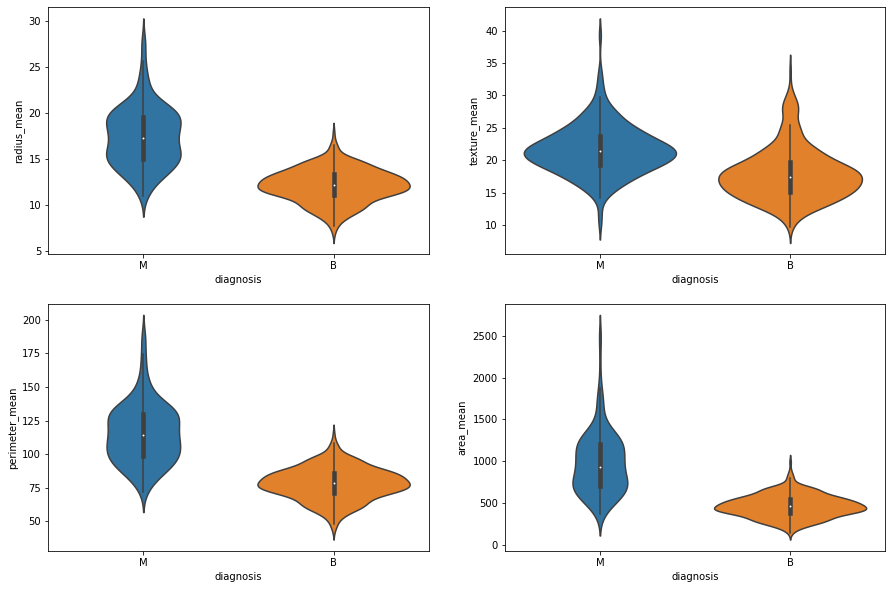

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='diagnosis',y='radius_mean',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='diagnosis',y='texture_mean',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='diagnosis',y='perimeter_mean',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='diagnosis',y='area_mean',data=df)

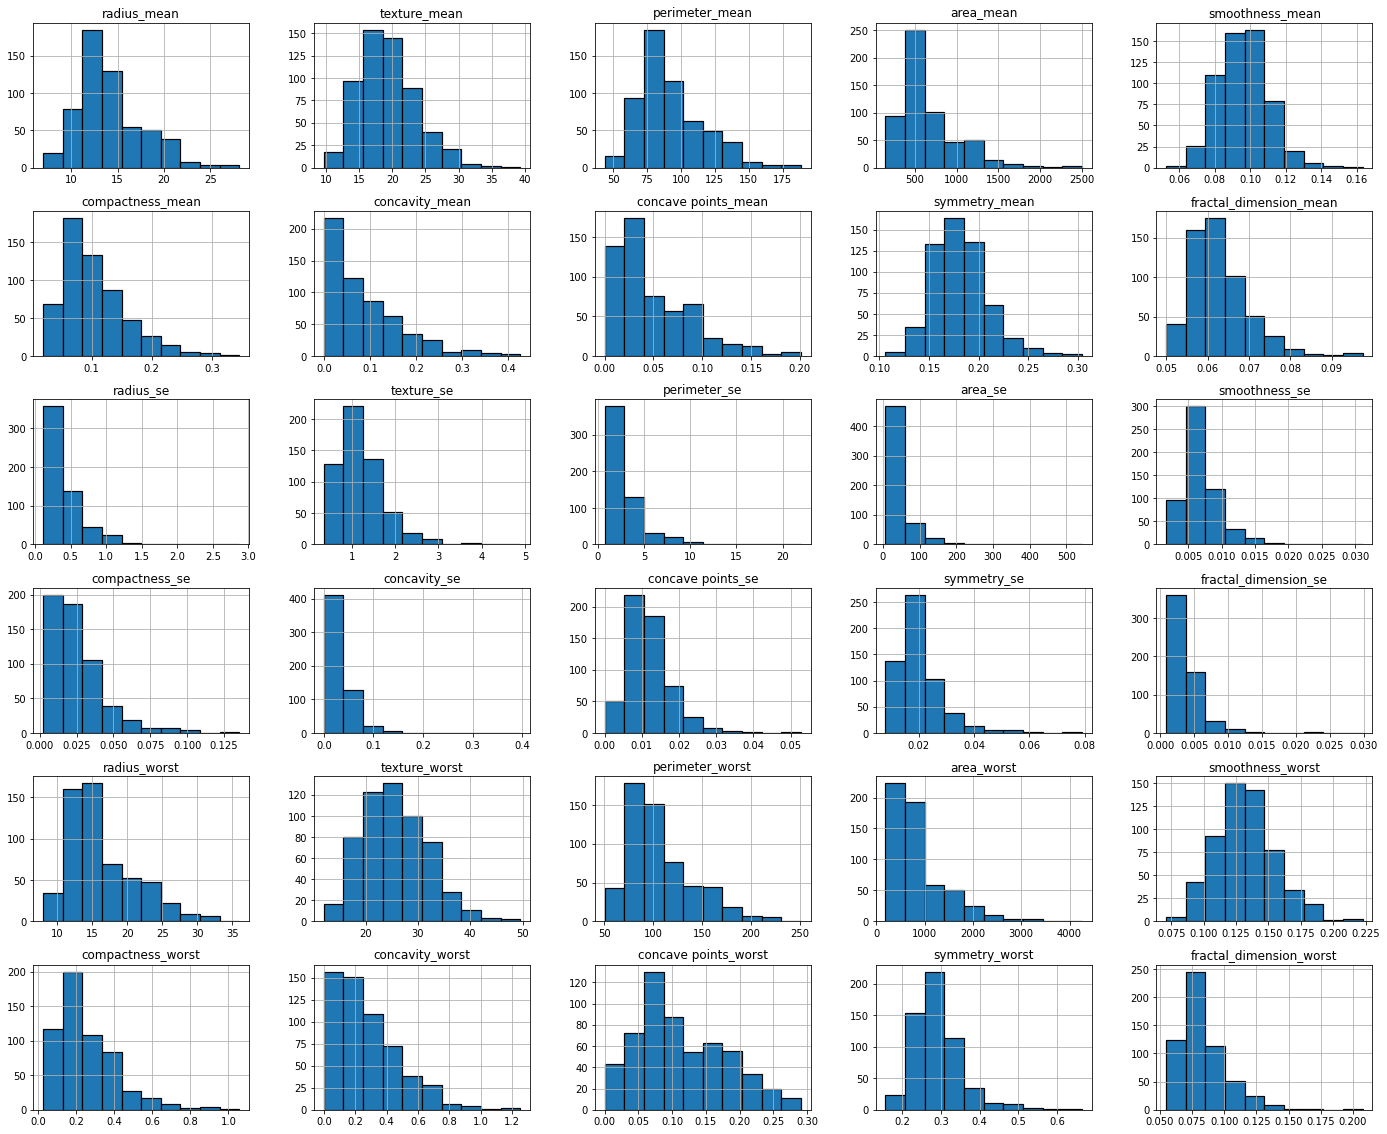

In [ ]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(24,20)
plt.show()

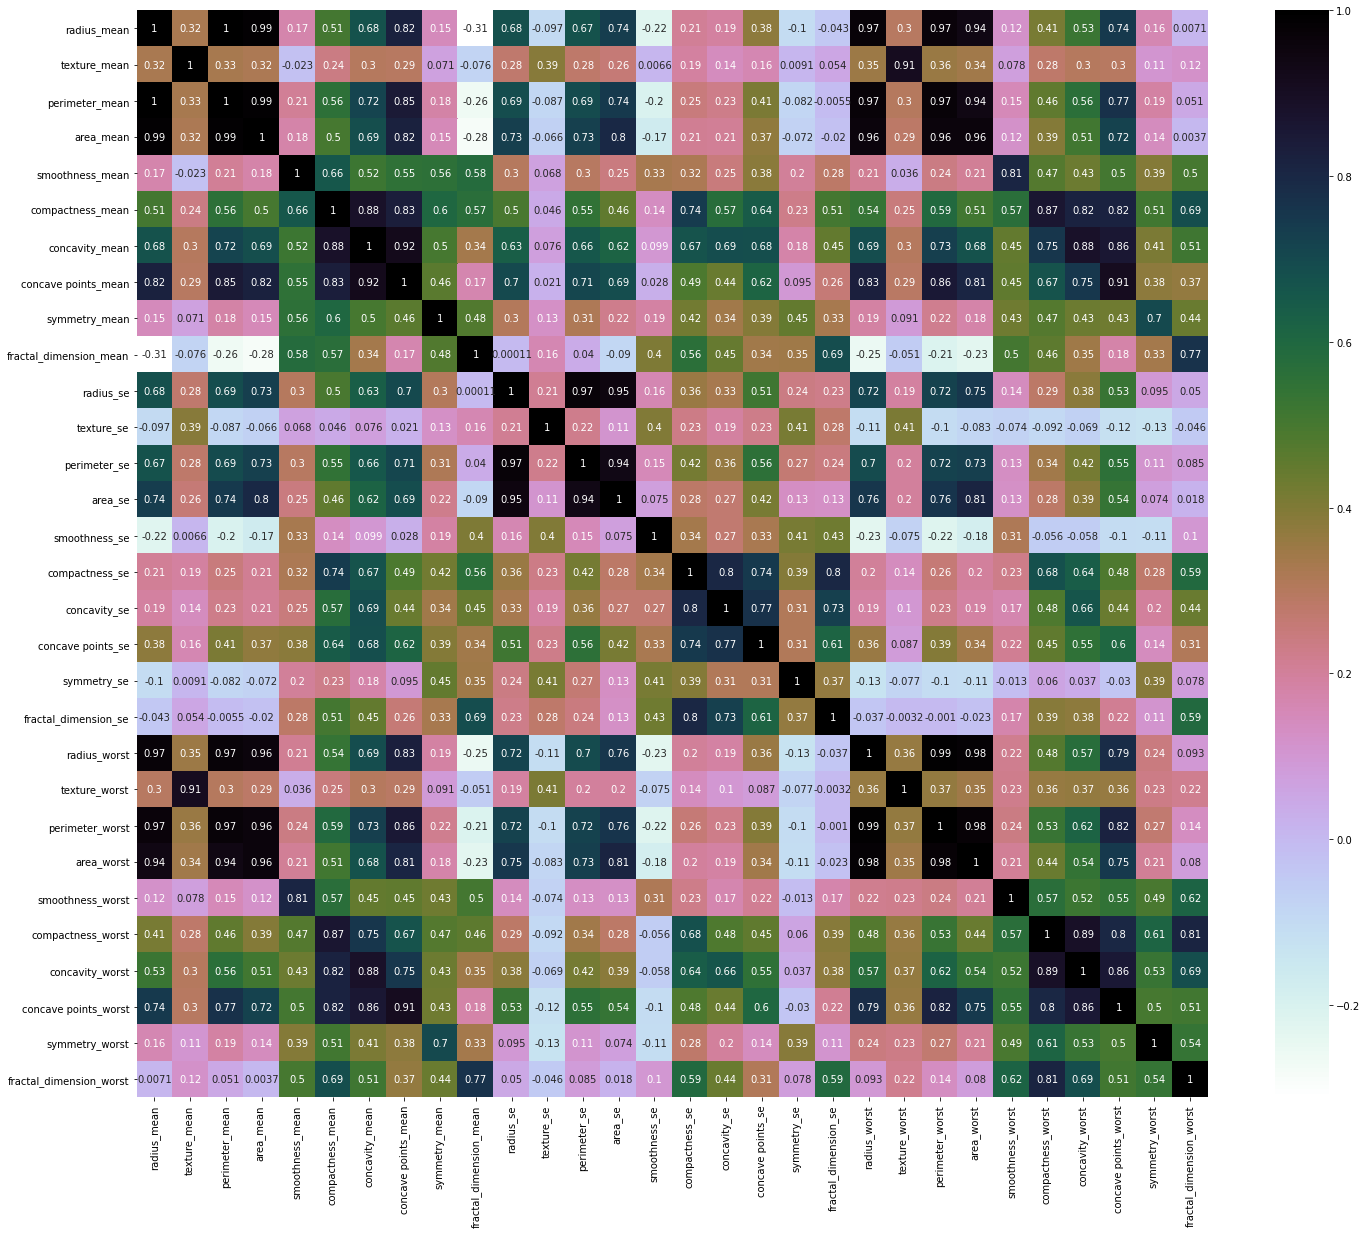

In [ ]:
plt.figure(figsize=(24,20))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')       #similar color features are correlated
plt.show()

**Observation:** Radius, Perimeter & Area are highly correlated

In [ ]:
df.describe()       # getting statistical data for each feature like min, max, average values
                    # it excludes NaN values

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df['diagnosis'].value_counts()           #this method gives total number of cases for each type of diagnosis required in the 'diagnosis' 

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
train, test = train_test_split(df, test_size = 0.3)        #split the given data into train & test data where 0.3 tells 70% train & 30% test data from the given data
print(train.shape)                                         #matrix size
print(test.shape)

(398, 31)
(171, 31)


In [ ]:
train_x = train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
train_y = train.diagnosis
test_x = test[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
test_y = test.diagnosis

**Labelling**

In [ ]:
le = LabelEncoder()                   #this method converts labels(in words/ digits) into machine understandable way i.e. in numbers (0,1,2,3,...)...Here as there are only 2 labels i.e. Benign (B) & Malignant (M)....therefore, 0 & 1
train_y = le.fit_transform(train_y)   #fit_transform() method assigns a value to the missing data by scaling and returns the completed dataset
test_y = le.transform(test_y)         #transform() method just returns the dataset without filling missing value

In [ ]:
train_y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,

# **Multi-Class Classifier**

**Naive Bayes**

In [ ]:
model = MultinomialNB()              #assigning the type of model/ classifier
model.fit(train_x,train_y)           #mapping (according to the model used) between train_x & train_y from the given training data takes place in this method 
prediction = model.predict(test_x)   #we pass the test_x values in this method to get the predicted test_y values for the corresponding test_x values

print('Accuracy :',accuracy_score(prediction,test_y))    #passing predicted value and actual value to get accuracy i.e. error/ true values
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.9239766081871345
Classification report :
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       112
           1       0.83      0.98      0.90        59

    accuracy                           0.92       171
   macro avg       0.91      0.94      0.92       171
weighted avg       0.93      0.92      0.93       171



**Supprot Vector Machine**

In [ ]:
model = SVC()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.9122807017543859
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       116
           1       0.79      1.00      0.88        55

    accuracy                           0.91       171
   macro avg       0.89      0.94      0.91       171
weighted avg       0.93      0.91      0.91       171



**K-Nearest Neighbours**

In [ ]:
model = KNeighborsClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.935672514619883
Classification report :
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       110
           1       0.86      0.98      0.92        61

    accuracy                           0.94       171
   macro avg       0.92      0.95      0.93       171
weighted avg       0.94      0.94      0.94       171



**Random Forest**

In [ ]:
model = RandomForestClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.9883040935672515
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       103
           1       0.97      1.00      0.99        68

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



**Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.9181286549707602
Classification report :
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       101
           1       0.90      0.90      0.90        70

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.9181286549707602
Classification report :
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        97
           1       0.93      0.88      0.90        74

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



**XGBoost**

In [ ]:
model = XGBClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.9824561403508771
Classification report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.97      0.99      0.98        69

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



**Adaboost**

In [ ]:
model = AdaBoostClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Accuracy : 0.9766081871345029
Classification report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        99
           1       0.99      0.96      0.97        72

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



**Catboost**

In [ ]:
model = CatBoostClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

print('Accuracy :',accuracy_score(prediction,test_y))
print("Classification report :")
print(classification_report(prediction,test_y))

Learning rate set to 0.006952
0:	learn: 0.6827015	total: 71.7ms	remaining: 1m 11s
1:	learn: 0.6722048	total: 90ms	remaining: 44.9s
2:	learn: 0.6621006	total: 100ms	remaining: 33.3s
3:	learn: 0.6517262	total: 111ms	remaining: 27.5s
4:	learn: 0.6421705	total: 120ms	remaining: 23.9s
5:	learn: 0.6339210	total: 129ms	remaining: 21.4s
6:	learn: 0.6238475	total: 139ms	remaining: 19.7s
7:	learn: 0.6152696	total: 148ms	remaining: 18.4s
8:	learn: 0.6055744	total: 157ms	remaining: 17.3s
9:	learn: 0.5972654	total: 167ms	remaining: 16.5s
10:	learn: 0.5882414	total: 176ms	remaining: 15.8s
11:	learn: 0.5795615	total: 185ms	remaining: 15.3s
12:	learn: 0.5715315	total: 195ms	remaining: 14.8s
13:	learn: 0.5629850	total: 204ms	remaining: 14.4s
14:	learn: 0.5548572	total: 215ms	remaining: 14.1s
15:	learn: 0.5472571	total: 224ms	remaining: 13.8s
16:	learn: 0.5396361	total: 233ms	remaining: 13.5s
17:	learn: 0.5321554	total: 242ms	remaining: 13.2s
18:	learn: 0.5258695	total: 251ms	remaining: 13s
19:	learn: 0

# **Result:** 
        (1) Logistic Regression has the height accuracy of 97.66 %
        (2) Naive Bayes has the lowest accuracy of 88.30 %
        (3) SVM & K-Nearest Neighbour have same accuracy of 92.397 %